In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [45]:
# Load data
data = pd.read_csv('/content/creditcard.csv')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [46]:
# Check for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [47]:
# Summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19898 entries, 0 to 19897
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19898 non-null  int64  
 1   V1      19898 non-null  float64
 2   V2      19898 non-null  float64
 3   V3      19898 non-null  float64
 4   V4      19898 non-null  float64
 5   V5      19898 non-null  float64
 6   V6      19898 non-null  float64
 7   V7      19898 non-null  float64
 8   V8      19898 non-null  float64
 9   V9      19898 non-null  float64
 10  V10     19898 non-null  float64
 11  V11     19897 non-null  float64
 12  V12     19897 non-null  float64
 13  V13     19897 non-null  float64
 14  V14     19897 non-null  float64
 15  V15     19897 non-null  float64
 16  V16     19897 non-null  float64
 17  V17     19897 non-null  float64
 18  V18     19897 non-null  float64
 19  V19     19897 non-null  float64
 20  V20     19897 non-null  float64
 21  V21     19897 non-null  float64
 22

In [48]:
# Check for duplicate entries
data.duplicated().sum()

69

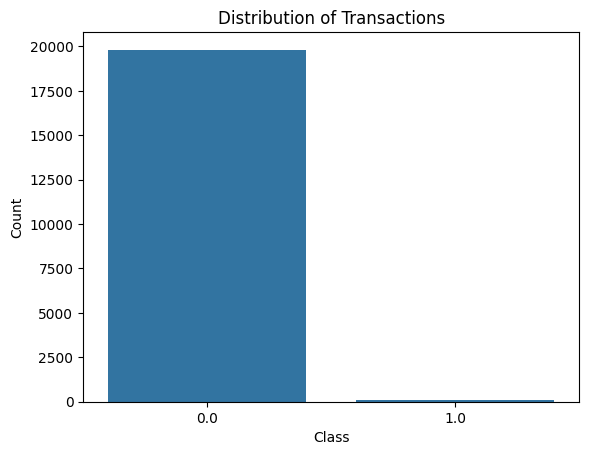

In [49]:
# Display class distribution
sns.barplot(x=data['Class'].value_counts().index, y=data['Class'].value_counts())
plt.title('Distribution of Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [50]:
# Display mean values for each class
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,15483.312841,-0.207233,0.215159,0.803126,0.250998,-0.137392,0.104262,-0.108931,0.003328,0.652123,...,0.036041,-0.050458,-0.145393,-0.036602,0.011905,0.121909,0.032495,0.010624,0.006940,70.169855
1.0,17436.164706,-8.862174,6.570214,-12.622087,6.343007,-6.187820,-2.567646,-8.600077,4.519437,-3.041592,...,0.725080,0.536833,-0.395312,-0.385599,-0.275306,0.359543,0.180456,0.907255,0.093985,93.869647


In [51]:
# Separate the data into fraudulent and non-fraudulent transactions
fraudulent_data = data[data['Class'] == 1]
non_fraudulent_data = data[data['Class'] == 0]

print("Fraudulent transactions shape:", fraudulent_data.shape)
print("Non-fraudulent transactions shape:", non_fraudulent_data.shape)

Fraudulent transactions shape: (85, 31)
Non-fraudulent transactions shape: (19812, 31)


In [52]:
# Undersample the majority class (non-fraudulent transactions)
non_fraudulent_data_sampled = non_fraudulent_data.sample(n=fraudulent_data.shape[0], random_state=1)
print("Sampled non-fraudulent transactions shape:", non_fraudulent_data_sampled.shape)

Sampled non-fraudulent transactions shape: (85, 31)


In [53]:
# Combine the balanced data
balanced_data = pd.concat([non_fraudulent_data_sampled, fraudulent_data], axis=0)
print("Balanced data shape:", balanced_data.shape)

Balanced data shape: (170, 31)


In [54]:
# Define features and target variable
features = balanced_data.drop('Class', axis=1)
target = balanced_data['Class']

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=1, stratify=target)
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

Training data shape: (153, 30), Testing data shape: (17, 30)


In [56]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
# Calculate accuracy of the model
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing data accuracy:", test_accuracy)

Testing data accuracy: 1.0
